<a href="https://colab.research.google.com/github/V-Lamba/Rock_vs_Mine-Predictor/blob/main/Rock_vs_Mine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time.

We are going to cover the following steps:

Load the Dataset (Import libraries and Load dataset)

Analyze Data (Descriptive Statistics)

Splitting the dataset into the Training set and Test set

Evaluate Algorithms: Baseline

Algorithm Tuning

Finalize Model based on selecting Best method



# **Load the Dataset (Import libraries and Load dataset)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('/content/sonar data.csv', header=None) # as we don't have any header names for the columns so put header=None

# **Analyze Data (Descriptive Statistics)**

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [ ]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts() # in column ,111 data enteries for rock and 97 enteries for sonar

M    111
R     97
Name: 60, dtype: int64

M --> Mine

R --> Rock

In [ ]:
sonar_data.groupby(60).mean() # mean values for all the columns for mine and rock separately

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1) # for dropping a column we write axis as 1 , for dropping a row we write axis as 0
Y = sonar_data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

# Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1) #stratify=Y , we needn to split the data based on rock and mine ... say for ex we need to have equal number/percentage  of rocks in tested , training data and equal number of mines in training, testing data as we have the original one.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

# Evaluate Algorithms: Baseline

We don't know what algorithms will do well on this dataset.We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [ ]:
predictions_df = pd.DataFrame()
predictions_df['action']=Y_test

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFT', RandomForestClassifier()))

In [ ]:

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=10) # on training data set
    results.append(cv_results)
    names.append(name)
    print('K-fold cross validation score->')
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    predictions_df[name.strip(":")]=y_pred
    test_data_accuracy = accuracy_score(y_pred, Y_test)
    print("model's accuracy score on the test data  :" , test_data_accuracy)

K-fold cross validation score->
LR: 0.759064 (0.077053)
model's accuracy score on the test data  : 0.7619047619047619
K-fold cross validation score->
KNN: 0.775439 (0.084318)
model's accuracy score on the test data  : 0.8095238095238095
K-fold cross validation score->
SVM: 0.801462 (0.089956)
model's accuracy score on the test data  : 0.8095238095238095
K-fold cross validation score->
NB: 0.711696 (0.142888)
model's accuracy score on the test data  : 0.6190476190476191
K-fold cross validation score->
DTC: 0.765789 (0.076376)
model's accuracy score on the test data  : 0.6666666666666666
K-fold cross validation score->
RFT: 0.823684 (0.086116)
model's accuracy score on the test data  : 0.8095238095238095


In [ ]:
predictions_df

,action,LR,KNN,SVM,NB,DTC,RFT
113,M,M,M,M,R,M,M
23,R,R,R,R,R,M,R
45,R,R,R,R,R,R,R
81,R,M,M,M,M,R,M
82,R,M,M,M,M,R,R
109,M,M,M,M,M,R,R
176,M,M,M,M,M,M,M
134,M,M,M,M,M,M,M
96,R,R,R,R,R,R,R
98,M,M,R,R,M,R,M


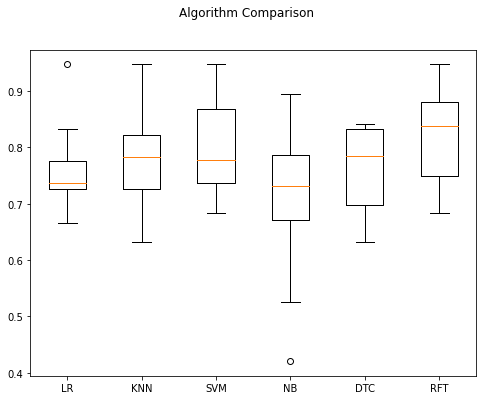

In [ ]:
# Compare Algorithms
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

The results suggest that k-Nearest Neighbors, Support Vector Machines and Random Forest Tree  may be worth further study.

# K-NN algorithm Tuning

We can start off by tuning the number of neighbors for KNN. The default number of neighbors is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [ ]:
# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)
grid_result = grid.fit(rescaledX, Y_train)
print("Best accuracy : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))


Best accuracy : 0.849708 using {'n_neighbors': 1}
#1 0.849708 (0.067279) with: {'n_neighbors': 1}
#2 0.844444 (0.062244) with: {'n_neighbors': 3}
#4 0.796199 (0.063526) with: {'n_neighbors': 5}
#3 0.802339 (0.074561) with: {'n_neighbors': 7}
#5 0.780409 (0.103067) with: {'n_neighbors': 9}
#6 0.742398 (0.106132) with: {'n_neighbors': 11}
#8 0.731871 (0.099862) with: {'n_neighbors': 13}
#9 0.726608 (0.111290) with: {'n_neighbors': 15}
#11 0.721345 (0.116769) with: {'n_neighbors': 17}
#10 0.721930 (0.126878) with: {'n_neighbors': 19}
#7 0.732456 (0.113917) with: {'n_neighbors': 21}


# Tuning SVM

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel.


The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0.


Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset.

In [ ]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.876901 using {'C': 2.0, 'kernel': 'rbf'}
#17 0.786257 (0.115016) with: {'C': 0.1, 'kernel': 'linear'}
#39 0.588304 (0.046652) with: {'C': 0.1, 'kernel': 'poly'}
#40 0.567251 (0.030917) with: {'C': 0.1, 'kernel': 'rbf'}
#29 0.732456 (0.071374) with: {'C': 0.1, 'kernel': 'sigmoid'}
#25 0.743275 (0.088174) with: {'C': 0.3, 'kernel': 'linear'}
#21 0.749415 (0.077096) with: {'C': 0.3, 'kernel': 'poly'}
#18 0.764327 (0.080270) with: {'C': 0.3, 'kernel': 'rbf'}
#20 0.754678 (0.073780) with: {'C': 0.3, 'kernel': 'sigmoid'}
#34 0.716374 (0.072312) with: {'C': 0.5, 'kernel': 'linear'}
#8 0.802924 (0.087331) with: {'C': 0.5, 'kernel': 'poly'}
#9 0.802339 (0.113247) with: {'C': 0.5, 'kernel': 'rbf'}
#23 0.744444 (0.111120) with: {'C': 0.5, 'kernel': 'sigmoid'}
#35 0.711404 (0.066831) with: {'C': 0.7, 'kernel': 'linear'}
#7 0.803216 (0.107355) with: {'C': 0.7, 'kernel': 'poly'}
#12 0.796784 (0.099941) with: {'C': 0.7, 'kernel': 'rbf'}
#22 0.749415 (0.099106) with: {'C': 0.7, 'kernel': 'sigm

# Tuning Random Forest Tree

In [ ]:
# random forest classifier algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators =[10,20,30,40,50]
criterion = ["gini", "entropy", "log_loss"]
param_grid = dict(n_estimators=n_estimators,criterion=criterion)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.835088 using {'criterion': 'gini', 'n_estimators': 10}
#1 0.835088 (0.079607) with: {'criterion': 'gini', 'n_estimators': 10}
#4 0.818421 (0.097456) with: {'criterion': 'gini', 'n_estimators': 20}
#10 0.802632 (0.081003) with: {'criterion': 'gini', 'n_estimators': 30}
#6 0.813158 (0.071173) with: {'criterion': 'gini', 'n_estimators': 40}
#8 0.808187 (0.078330) with: {'criterion': 'gini', 'n_estimators': 50}
#9 0.807602 (0.090585) with: {'criterion': 'entropy', 'n_estimators': 10}
#7 0.812573 (0.080380) with: {'criterion': 'entropy', 'n_estimators': 20}
#5 0.817836 (0.080418) with: {'criterion': 'entropy', 'n_estimators': 30}
#2 0.834795 (0.077275) with: {'criterion': 'entropy', 'n_estimators': 40}
#3 0.829532 (0.080673) with: {'criterion': 'entropy', 'n_estimators': 50}
#11 nan (nan) with: {'criterion': 'log_loss', 'n_estimators': 10}
#12 nan (nan) with: {'criterion': 'log_loss', 'n_estimators': 20}
#13 nan (nan) with: {'criterion': 'log_loss', 'n_estimators': 30}
#14 nan (nan)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

# Finalize Model based on selecting Best method

Traing model : SVM

In [ ]:
model = SVC(C=2.0,kernel='rbf')

In [ ]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

SVC(C=2.0)

Model Evaluation

In [ ]:
#accuracy on training data
#in most of the cases accuracy of training data will be more bcoz the model has already seen this training data and most of the times the accuracy of test data will be less
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train,X_train_prediction)

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9411764705882353


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8095238095238095


Making a Predictive System

In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # we have 1 row and unknown columns # -1 -> It simply means that it is an unknown dimension and we want numpy to figure it out

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'): #prediction[0] means the first element of prediction
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine
